In [34]:
from snr import generate_poisson_observations
from in_progress.utils.ring_attractor_data import data_gen
from hydra import compose, initialize
import numpy as np # noqa
from matplotlib import pyplot as plt
import torch

from hydra.core.global_hydra import GlobalHydra

if GlobalHydra.instance().is_initialized():
    GlobalHydra.instance().clear()
initialize(version_base=None, config_path='./ra_xfads_training', job_name="lds")
cfg = compose(config_name="config")

In [3]:
kw = data_gen(100, 750, 2, 1e-1, rnn_kwargs={'t_conj':10}, cfg=cfg)
z = kw['z_train']

In [13]:
kw['C'].weight.shape

torch.Size([100, 2])

In [43]:
latentTraj = z.squeeze().detach().numpy()
C = kw['C'].weight.detach().numpy().mT
print(f'shape of latentTraj: {latentTraj.shape}')

shape of latentTraj: (750, 2)


In [44]:
# generate_poisson_observations(latentTraj)

In [45]:
# latentTraj = np.random.randn(1000, 10)

observations, C, b, firing_rate_per_bin, SNR = generate_poisson_observations(
    latentTraj,
    C=C,
    dNeurons=100,
    targetRatePerBin=0.7,
    pCoherence=0.5,
    pSparsity=0.1,
    targetSNR=0.1,
    # SNR_method=compute_SNR,
)


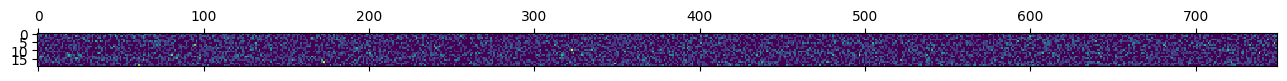

In [46]:
plt.matshow(observations[..., :20].T)

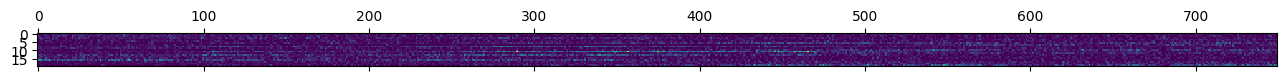

In [38]:
rate = torch.nn.(kw['y_train']).squeeze()

observations = torch.distributions.poisson.Poisson(rate).sample()
plt.matshow(observations[..., :20].T)

(array([ 45., 166., 193., 153.,  89.,  59.,  32.,  11.,   1.,   1.]),
 array([0.89999998, 1.05799997, 1.21599996, 1.37400007, 1.53200006,
        1.69000006, 1.84800005, 2.00600004, 2.16400003, 2.32200003,
        2.48000002]),
 <BarContainer object of 10 artists>)

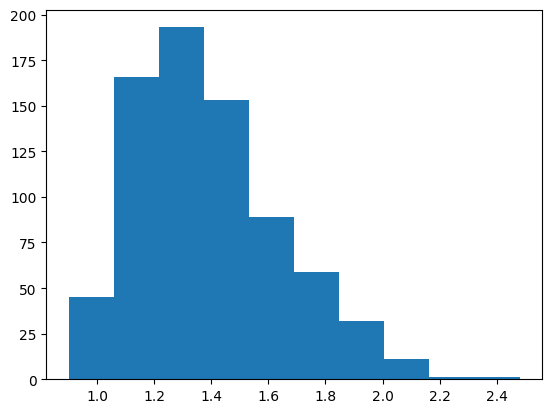

In [42]:
plt.hist(torch.mean(observations, dim=-1).numpy())